<a href="https://colab.research.google.com/github/miraqulass/MachineLearning/blob/MLPractices/NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NEURAL NETMWORKS**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images[0,23,23]

194

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/Top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

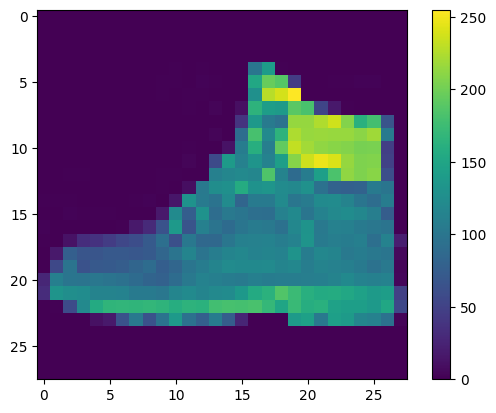

In [ ]:
plt.figure()
plt.imshow(train_images[90])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Data Preprocessing

train_images = train_images / 255.0

test_images = test_images / 255.0

In [ ]:
# Building the model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4987 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3751 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3356 - accuracy: 0.8774
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3107 - accuracy: 0.8871
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2934 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2791 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2659 - accuracy: 0.9019
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2570 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2480 - accuracy: 0.9060
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.238

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test Accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3287 - accuracy: 0.8855
Test Accuracy: 0.8855000138282776


313/313 [==============================] - 1s 2ms/step
Ankle boot


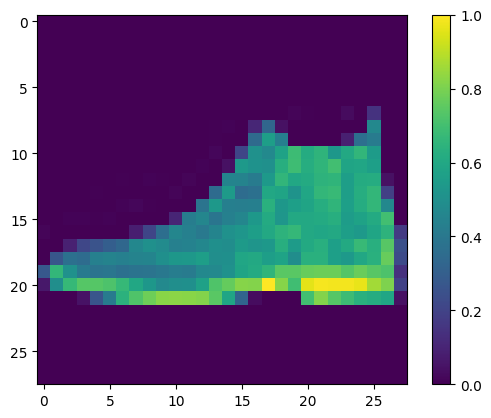

In [ ]:
predictions = model.predict(test_images)

print(class_names[np.argmax(predictions[0])])

plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 9
1/1 [==============================] - 0s 30ms/step


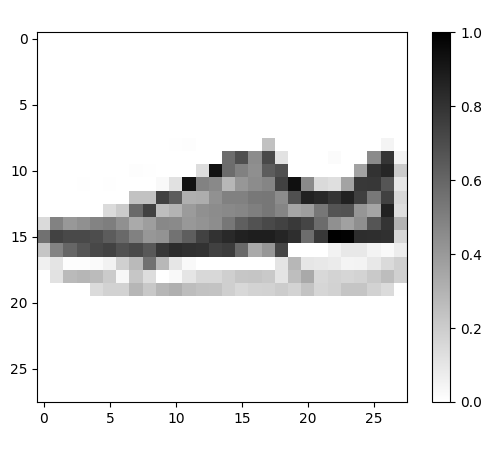

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/Top','Trousers','Pullover','Dress','Coat',
                 'Sandal','Shirt','Sneaker','Bag','Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title('Expected:' + label)
  plt.xlabel('Guess:' + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input('Pick a number: ')
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print('Try again...')

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)